In [1]:
# initial setup
#%run "../../../common/0_notebooks_base_setup.py"

import os, sys

notebook_base_path = os.getcwd()
if notebook_base_path not in sys.path:
    sys.path.append(notebook_base_path)


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>

# Setup

Para trabajar con esat notebook debemos crear un **nuevo ambiente** en Anaconda e instalar algunas bibliotecas siguiendo estas instrucciones:

Desde Anaconda Prompt en Windows, y desde la terminal en Linux o Mac vamos a ejeutar una a una esats lineas:

<code>conda create --yes --name dhdsblend2021_clase10 python=3.7</code>

<code>conda activate dhdsblend2021_clase10</code>

<code>conda install jupyterlab=2.2.6</code>

<code>conda install -c conda-forge nb_conda_kernels=2.3.1</code>

<code>conda install -c conda-forge pyproj=2.4.2.post1</code>

<code>conda install -c conda-forge descartes=1.1.0</code>

<code>conda install -c conda-forge geopandas=0.8.1</code>

<code>conda install -c conda-forge geopy=2.0.0</code>

<code>conda install -c conda-forge matplotlib=3.2.2</code>

<code>conda install -c anaconda seaborn=0.11.0</code>

<code>conda install -c conda-forge contextily=1.1.0</code> 


Una vez instaladas las bibliotecas, **cerramos jupyter lab**, y volvemos a **iniciarlo desde el ambiente recién creado: dhdsblend2021_clase10**

Después de hacer esto, los import de la siguiente celda deberán funcionar sin dar error.



In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import contextily as ctx

ModuleNotFoundError: No module named 'geopandas'


# Mapas


<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_intro)

[Geopandas y Contextily](#section_geopandas)

[Matplotlib](#section_matplotlib)

---



## Mapping


<a id="section_intro"></a> 
###  Intro
[volver a TOC](#section_toc)

Los mapas son un tipo de gráfico muy útil para representar los datos geoespaciales.

En general disponemos de dos capas: 

- una con los datos que se quieren mostrar (ciudades, lugares, etc), para lo que necesitamos sus coordenadas.

- otra con el mapa donde se visualizan los datos.

Veremos dos formas de hacerlos.

<a id="section_geopandas"></a> 
### Geopandas - Contextily
[volver a TOC](#section_toc)

Como ya vimos, *GeoPandas* es una extensión de Pandas, lo que permite trabajar con *Geoseries* y *GeoDataFrame*, estructuras similares a las *Series* y *Dataframe*, pero con al menos una columna con tipos de datos geoespaciales. Esta columna se la llama por default *geometry*.

Geopandas también extiende los métodos de `MatpLotlib` para graficar, y mediante la libreria `contextily` ofrece mapas donde se grafican los datos.

En este ejemplo, vamos a graficar los pozos petroleros de Argentina sobre el mapa del pais.

Dataset: http://datos.minem.gob.ar/dataset/produccion-de-petroleo-y-gas-por-pozo

In [3]:
df_pozos = pd.read_csv("../Data/capitulo-iv-pozos.csv")

In [4]:
df_pozos.head()

,idpozo,sigla,formprod,coordenadax,coordenaday
0,212,CH.CH.EaLE.x-1,CORI,-68.287853,-45.591133
1,213,CH.CH.EaLE.x-2,CORI,-68.292019,-45.592025
2,214,CH.CH.EaLE-3,CORI,-68.283878,-45.590244
3,215,CH.CH.EaLE-4,CORI,-68.289483,-45.594069
4,216,CH.CH.EaLE-5,CORI,-68.294475,-45.594450


Transformamos las coordenadas numéricas en la forma geométrica *Punto*.

In [5]:
geo_pozos = gpd.GeoDataFrame(df_pozos
                     , geometry=gpd.points_from_xy(df_pozos.coordenadax, df_pozos.coordenaday))

In [6]:
geo_pozos.head(2)

,idpozo,sigla,formprod,coordenadax,coordenaday,geometry
0,212,CH.CH.EaLE.x-1,CORI,-68.287853,-45.591133,POINT (-68.28785 -45.59113)
1,213,CH.CH.EaLE.x-2,CORI,-68.292019,-45.592025,POINT (-68.29202 -45.59202)


Ya podemos graficar los pozos. Observemos que se ubican mediante las coordenadas latitud y longitud.

Se usan los métodos que se extienden desde Matplotlib para los títulos, labels, grid y plot.

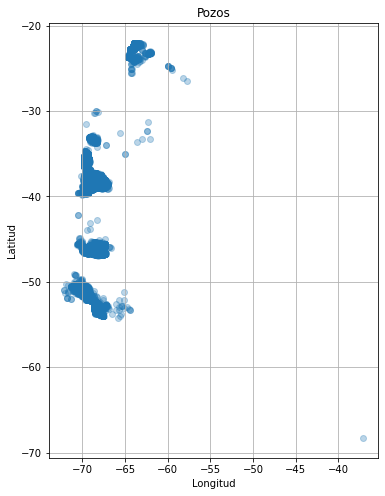

In [7]:
# Muestra los pozos en un gráfico con latitud y longitud
fig, ax = plt.subplots(figsize=(6,8))
ax.set_title('Pozos')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.grid()

geo_pozos.plot(ax=ax,
               legend = True,
               alpha=0.3)
plt.show()

Ahora sobre el gráfico vamos a agregar la capa del mapa. 

Tenemos que realizar tres pasos adicionales:

- en #1 informamos qué sistema de coordenadas (*CRS*) estamos usando. EPSG:4326 indica que es el sistema que mide latitud y longitud.

- en #2 cambiamos al CRS 3857 (Spheric Mercator). Es el que requiere la libreria `contextily`.

- #3 usamos el método `add_basemap` de la libreria contextily para agregar el mapa.

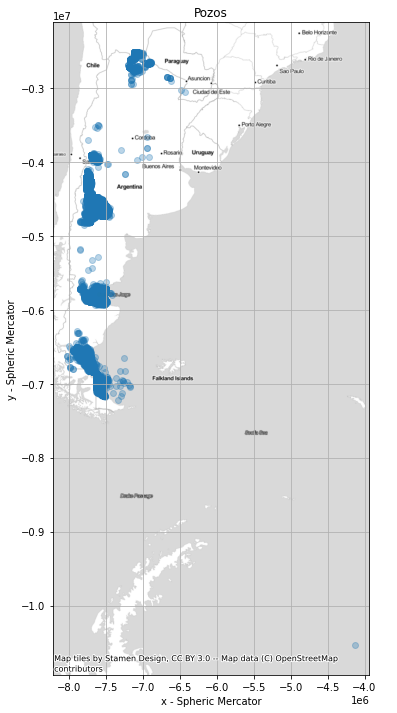

In [8]:
# Muestra los pozos en un mapa real, con medidas segun escala Spheric Mercator
fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Pozos')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()

geo_pozos.crs = "EPSG:4326"                        #1
geo_pozos_3857 = geo_pozos.to_crs(epsg=3857)       #2
geo_pozos_3857.plot(ax=ax,
                   legend = True,
                   alpha=0.3)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) #3

#NOTA: el warning se genera para el código geo_pozos.to_crs(epsg=3857).

Podemos hacer un "zoom" para ver con más detalle una parte del mapa.

El método `bounds` nos permite hacer un slice de los puntos (pozos) usando las coordenadas.

En este ejemplo, recortamos el mapa al área entre -60 y -65 de latitud, y entre -20 y -30 de longitud.

In [9]:
geo_pozos_norte = geo_pozos[(geo_pozos.bounds.minx<-60) & (geo_pozos.bounds.maxx>-65) &
                            (geo_pozos.bounds.miny<-20) & (geo_pozos.bounds.maxy>-30) ]

In [10]:
# paleta de colores
colors = ['#A1E2E6', '#E6BDA1', '#B3A16B', '#678072', '#524A4A']

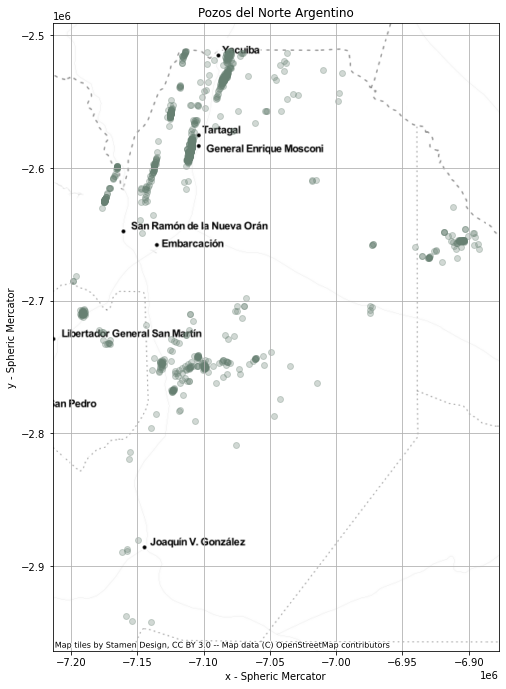

In [11]:
# Muestra los pozos en un mapa real, con medidas segun escala Spheric Mercator
fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Pozos del Norte Argentino')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()
geo_pozos_norte.crs = "EPSG:4326"
geo_pozos_norte_3857 = geo_pozos_norte.to_crs(epsg=3857)
geo_pozos_norte_3857.plot(ax=ax,
                   color=colors[3],
                   legend = True,
                   alpha=0.3)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

<a id="section_matplotlib"></a> 
### Matplotlib
[volver a TOC](#section_toc)

Matplotlib también permite generar mapas, mediante el uso del método `ax.scatter` para marcar los puntos (por ejemplo, ciudades), y el método `imshow` para graficar la imagen con el mapa. 

En este ejemplo vamos a registrar lugares de Rio de Janeiro sobre el mapa de la ciudad.

Generamos un data frame con las coordenadas de los lugares:

In [12]:
data = {'longitud': [-22.984, -22.975, -22.958, -22.969],
        'latitud': [-43.197, -43.183, -43.209, -43.227],
        'lugar': ['Jardin botanico', 'Cristo Redentor', 'Praia Copacabana', 'Praia Ipanema']}
df_rio = pd.DataFrame(data)

Establecemos los límites donde se encuentran los puntos. Es decir, generamos un rectangulo con valores de latitud y longitud suficientes para contener a todos los lugares:

In [13]:
BBox = (-22.9898, -22.94614, -43.2337, -43.1680)

Cargamos el mapa generado con OpenStreetMap.

Ver como hacerlo en: https://medium.com/@abuqassim115/thanks-for-your-response-frank-fb869824ede2

In [14]:
ruh_m = plt.imread('../Data/map.png')

Ya podemos crear el mapa con los lugares.

Con `scatter` ubicamos los puntos, los lugares, y con `imshow` graficamos el mapa.

Observar que se deben setear los límites de los ejes X e Y con los valores del rectangulo creado en *BBox*.

Con el `for` agregamos los nombres de los lugares.

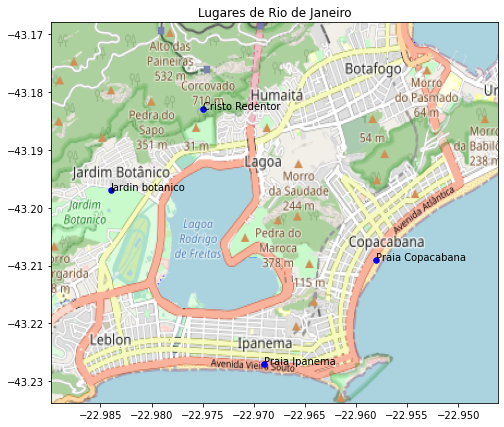

In [15]:
fig, ax = plt.subplots(figsize = (8,7))

ax.set_title('Lugares de Rio de Janeiro')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.scatter(df_rio.longitud, df_rio.latitud, zorder=1, alpha= 1, c='b', s=30)
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'auto')

for i, txt in enumerate(df_rio.lugar):
    ax.annotate(txt, (df_rio.longitud[i],df_rio.latitud[i]))

---

### Referencias

Geopandas Documentacion

https://geopandas.org/index.html

The GeoPandas Cookbook

https://www.martinalarcon.org/2018-12-31-d-geopandas/

Easy Steps To Plot Geographic Data on a Map — Python

https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db